In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
downsample_data  =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Trimester 3/downsample_df.csv')

Model 5: Generic Random Forest Regressor Model for FSO Model

In [ ]:
# Set up the data by removing time
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.25, random_state=42)
rf_fso = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

# Store results
results = []
for num_features in range(X.shape[1], 0, -1):
    # Train the model
    rf_fso.fit(X_train_fso, y_train_fso)
    y_pred_fso = rf_fso.predict(X_test_fso)

    # Calculate RMSE and R2
    rmse_fso = round(np.sqrt(mean_squared_error(y_test_fso, y_pred_fso)), 2)
    r2_fso = round(r2_score(y_test_fso, y_pred_fso), 2)
    oob_score_fso = round(rf_fso.oob_score_, 2)

    # Feature Importance
    importances_fso = rf_fso.feature_importances_
    indices_fso = np.argsort(importances_fso)[::-1]

    # Remove the least important feature
    least_important_feature_fso = X_train_fso.columns[indices_fso[-1]]
    print(f"Removing least important feature: {least_important_feature_fso}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_fso, rmse_fso, r2_fso,
                    oob_score_fso))

    X_train_fso = X_train_fso.drop(columns=[least_important_feature_fso])
    X_test_fso = X_test_fso.drop(columns=[least_important_feature_fso])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
                        'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)

Removing least important feature: Frequency
Removing least important feature: RainIntensityMax
Removing least important feature: RainIntensityMin
Removing least important feature: WindDirection
Removing least important feature: SYNOPCode
Removing least important feature: RainIntensity
Removing least important feature: WindSpeedMin
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMax
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: Time
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMax
Removing least important feature: TemperatureDifference
Removing least important feature: TemperatureMin
Removing least important feature: RelativeHumidity
Removing least important feature: Particulate
Removing least important feature: VisibilityMin
Removing least important feature: AbsoluteHumidity
Removing least important featu

In [ ]:
# Find the best RMSE and R2
best_rmse = results_df['RMSE'].min()
best_r2 = results_df['R2'].max()

# Select the rows that have the best RMSE and R2
optimal_rmse_rows = results_df[results_df['RMSE'] == best_rmse]
optimal_r2_rows = results_df[results_df['R2'] == best_r2]

# Get the minimum number of features needed for the best RMSE and R2
min_features_rmse = optimal_rmse_rows['Num_Features'].min()
min_features_r2 = optimal_r2_rows['Num_Features'].min()

# Find the overall minimum number of features needed
final_min_features_fso1 = max(min_features_rmse, min_features_r2)

print(f"\nBest RMSE is: {best_rmse} with minimum features: {min_features_rmse}")
print(f"Best R2 is: {best_r2} with minimum features: {min_features_r2}")
print(f"\nThe overall minimum number of features needed to achieve optimal performance is: {final_min_features_fso1}")


Best RMSE is: 1.1 with minimum features: 20
Best R2 is: 0.94 with minimum features: 21

The overall minimum number of features needed to achieve optimal performance is: 21


In [ ]:
results_df_fso1 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_fso1

,Least_Important_Feature,RMSE,R2
0,Frequency,1.12,0.93
1,RainIntensityMax,1.11,0.93
2,RainIntensityMin,1.11,0.93
3,WindDirection,1.11,0.93
4,SYNOPCode,1.10,0.94
5,RainIntensity,1.10,0.93
6,WindSpeedMin,1.11,0.93
7,WindSpeed,1.11,0.93
8,WindSpeedMax,1.11,0.93
9,AbsoluteHumidityMin,1.14,0.93


Model 6: Generic Extra Trees Regressor for FSO attenuation Model

In [ ]:
# Set up the data by removing time
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso,
                                                test_size=0.25, random_state=42)
# Initialize ExtraTreesRegressor with bootstrap=True
et_fso = ExtraTreesRegressor(n_estimators=100, random_state=42, oob_score=True,
                             bootstrap=True)

# Store results
results = []
for num_features in range(X.shape[1], 0, -1):
    # Train the model
    et_fso.fit(X_train_fso, y_train_fso)
    y_pred_fso = et_fso.predict(X_test_fso)

    # Calculate RMSE and R2
    rmse_fso = round(np.sqrt(mean_squared_error(y_test_fso, y_pred_fso)), 2)
    r2_fso = round(r2_score(y_test_fso, y_pred_fso), 2)
    oob_score_fso = round(et_fso.oob_score_, 2)

    # Feature Importance
    importances_fso = et_fso.feature_importances_
    indices_fso = np.argsort(importances_fso)[::-1]

    # Remove the least important feature
    least_important_feature_fso = X_train_fso.columns[indices_fso[-1]]
    print(f"Removing least important feature: {least_important_feature_fso}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_fso, rmse_fso, r2_fso,
                    oob_score_fso))

    X_train_fso = X_train_fso.drop(columns=[least_important_feature_fso])
    X_test_fso = X_test_fso.drop(columns=[least_important_feature_fso])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
                        'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)


Removing least important feature: Frequency
Removing least important feature: WindDirection
Removing least important feature: RainIntensityMax
Removing least important feature: RainIntensity
Removing least important feature: RainIntensityMin
Removing least important feature: WindSpeedMin
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMax
Removing least important feature: TemperatureDifference
Removing least important feature: RelativeHumidity
Removing least important feature: SYNOPCode
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: ParticulateMin
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: Time
Removing least important feature: TemperatureMax
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMin
Removing least important feature: VisibilityMin
Removing least important feature: AbsoluteHumidity
Removing least important fe

In [ ]:
# Find the best RMSE and R2
best_rmse = results_df['RMSE'].min()
best_r2 = results_df['R2'].max()

# Select the rows that have the best RMSE and R2
optimal_rmse_rows = results_df[results_df['RMSE'] == best_rmse]
optimal_r2_rows = results_df[results_df['R2'] == best_r2]

# Get the minimum number of features needed for the best RMSE and R2
min_features_rmse = optimal_rmse_rows['Num_Features'].min()
min_features_r2 = optimal_r2_rows['Num_Features'].min()

# Find the overall minimum number of features needed
final_min_features_fso2 = min(min_features_rmse, min_features_r2)

print(f"\nBest RMSE is: {best_rmse} with minimum features: {min_features_rmse}")
print(f"Best R2 is: {best_r2} with minimum features: {min_features_r2}")
print(f"\nThe overall minimum number of features needed to achieve optimal performance is: {final_min_features_fso2}")


Best RMSE is: 1.1 with minimum features: 18
Best R2 is: 0.94 with minimum features: 18

The overall minimum number of features needed to achieve optimal performance is: 18


In [ ]:
results_df_fso2 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_fso2

,Least_Important_Feature,RMSE,R2
0,Frequency,1.12,0.93
1,WindDirection,1.12,0.93
2,RainIntensityMax,1.10,0.94
3,RainIntensity,1.10,0.94
4,RainIntensityMin,1.10,0.94
5,WindSpeedMin,1.10,0.94
6,WindSpeed,1.10,0.94
7,WindSpeedMax,1.10,0.94
8,TemperatureDifference,1.13,0.93
9,RelativeHumidity,1.17,0.93


PLOTS

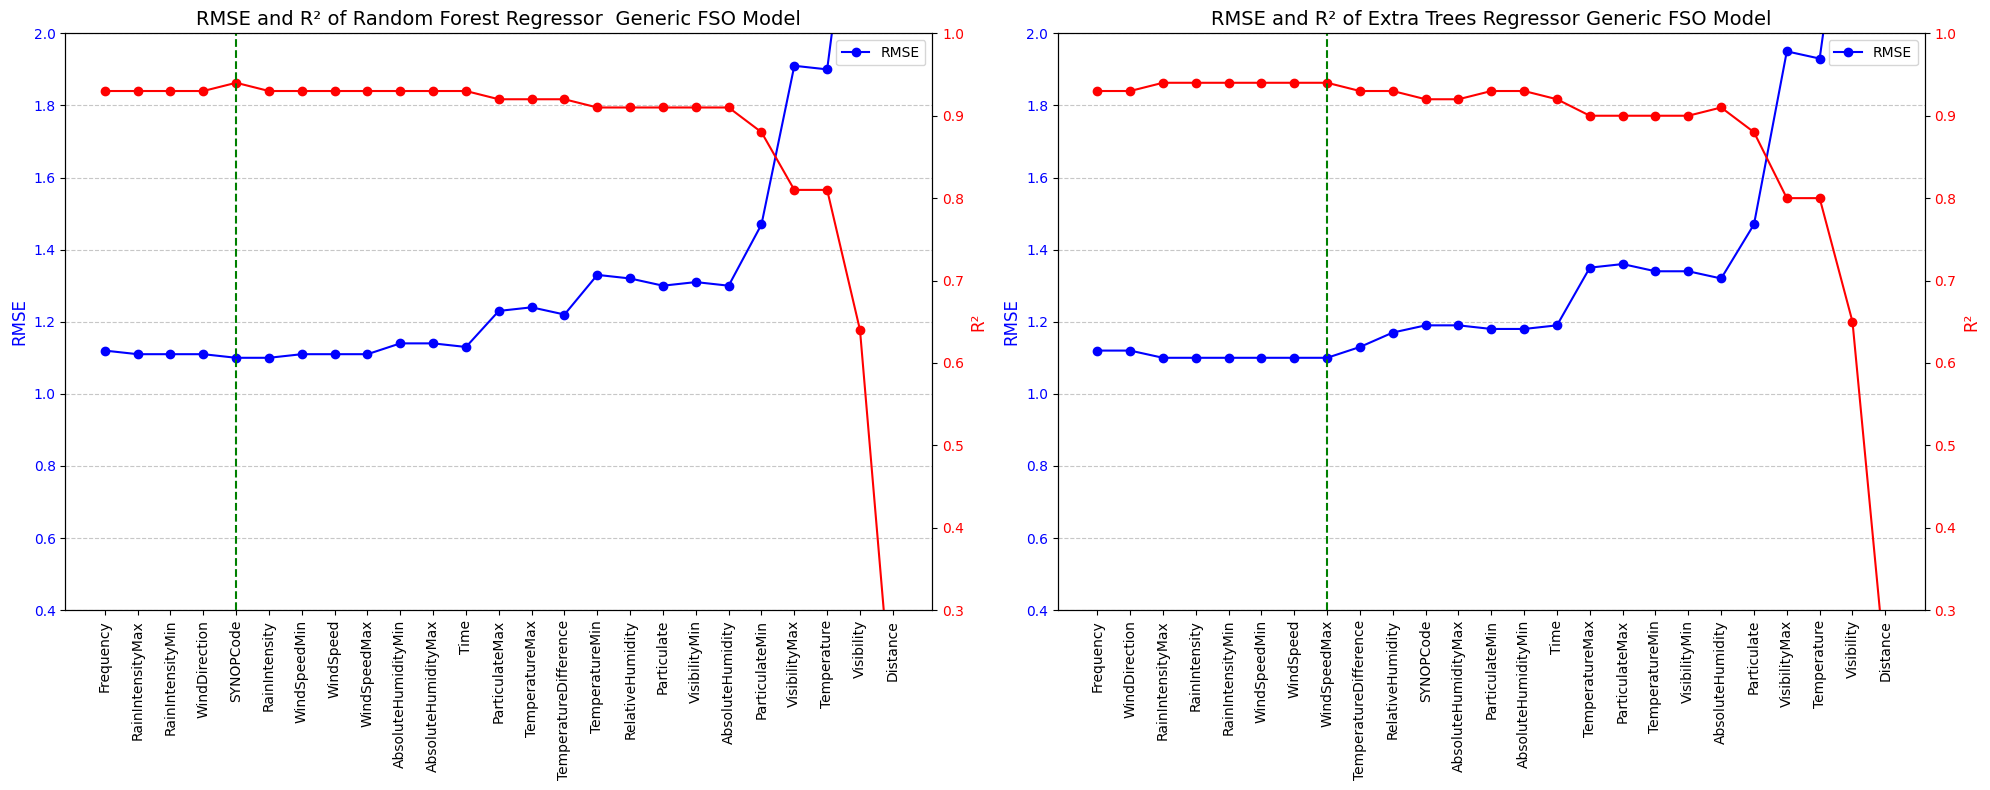

In [ ]:
# Create subplots for Random Forest and Extra Trees Regressors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Random Forest Plot
ax1.plot(results_df_fso1['Least_Important_Feature'], results_df_fso1['RMSE'],
         color='blue', marker='o', label='RMSE')
ax1.set_ylabel('RMSE', color='blue', fontsize=12)
ax1.set_ylim(0.4, 2)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for R2 with a shared x-axis
ax2_R2 = ax1.twinx()
ax2_R2.plot(results_df_fso1['Least_Important_Feature'], results_df_fso1['R2'],
            color='red', marker='o', label='R²')
ax2_R2.set_ylabel('R²', color='red', fontsize=12)
ax2_R2.set_ylim(0.3, 1)
ax2_R2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features for Random Forest
plt.axvline(x= 25-final_min_features_fso1, color='green', linestyle='--', label='Optimal Features')

# Title for Random Forest Plot
ax1.set_title('RMSE and R² of Random Forest Regressor  Generic FSO Model', fontsize=14)

# Extra Trees Plot
ax2.plot(results_df_fso2['Least_Important_Feature'], results_df_fso2['RMSE'],
         color='blue', marker='o', label='RMSE')
ax2.set_ylabel('RMSE', color='blue', fontsize=12)
ax2.set_ylim(0.4, 2)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for R2 with a shared x-axis
ax2_R2 = ax2.twinx()
ax2_R2.plot(results_df_fso2['Least_Important_Feature'], results_df_fso2['R2'],
            color='red', marker='o', label='R²')
ax2_R2.set_ylabel('R²', color='red', fontsize=12)
ax2_R2.set_ylim(0.3, 1)
ax2_R2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features for Extra Trees
plt.axvline(x= 25-final_min_features_fso2, color='green', linestyle='--', label='Optimal Features')

# Title for Extra Trees Plot
ax2.set_title('RMSE and R² of Extra Trees Regressor Generic FSO Model', fontsize=14)

# Rotate x-axis labels to 90 degrees for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='center')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90, ha='center')

# Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Create a DataFrame with the given data
data = {
    'Model': ['Random Forest Regressor', 'Extra Trees Regressor'],
    'Optimal Features': [21, 18],
    'RMSE': [1.10, 1.10],
    'R2': [0.94, 0.94]
}

results_df = pd.DataFrame(data)

# Display the table
print("Model Performance Comparison:")
print(results_df.to_string(index=False))


Model Performance Comparison:
                  Model  Optimal Features  RMSE   R2
Random Forest Regressor                21   1.1 0.94
  Extra Trees Regressor                18   1.1 0.94


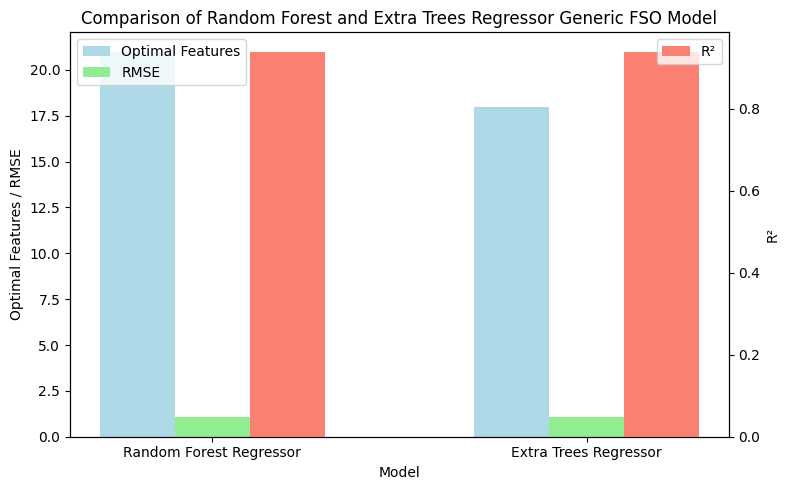

In [ ]:
# Set the position of bars on the x-axis
x = np.arange(len(results_df['Model']))

# Width of the bars
width = 0.2

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create bars for Optimal Features
bar1 = ax1.bar(x - width, results_df['Optimal Features'], width, label='Optimal Features', color='lightblue')

# Create bars for RMSE
bar2 = ax1.bar(x, results_df['RMSE'], width, label='RMSE', color='lightgreen')

# Create a second y-axis for R²
ax2 = ax1.twinx()
bar3 = ax2.bar(x + width, results_df['R2'], width, label='R²', color='salmon')

# Labeling
ax1.set_xlabel('Model')
ax1.set_ylabel('Optimal Features / RMSE', color='black')
ax2.set_ylabel('R²', color='black')
ax1.set_title('Comparison of Random Forest and Extra Trees Regressor Generic FSO Model')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'])
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

The best Model is Extra Trees Regressor with 1 features